In [285]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [286]:
plt.style.use('default')
matplotlib.rcParams['figure.figsize'] = (9, 6)
matplotlib.rc('image', cmap='RdBu')
sns.set_palette('Reds')

In [287]:
## Code adapted from Arden Dertat
def plot_decision_boundary(func, X, y):
    min_input = min(X.min(axis=0)) - 0.1
    max_input = max(X.max(axis=0) + 0.1)
    input_range = np.linspace(min_input, max_input, 100)
    aa, bb = np.meshgrid(input_range, input_range)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = func(ab)
    cc = c.reshape(aa.shape)
    cm_bright = ListedColormap(['#ff0000','#009dff'])
    fig, ax = plt.subplots()
    contour = plt.contourf(aa, bb, cc, alpha=0.8)    
    ax_c = fig.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.xlim(min_input, max_input)
    plt.ylim(min_input, max_input)

def plot_confusion_matrix(model, X, y):
    y_pred = (model.predict(X) > 0.5).astype("int32")
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', alpha=0.8, vmin=0)

In [288]:
def plot_accuracy(fit):
    plt.plot(fit.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()

In [289]:
spiral_data = pd.read_csv("~/Desktop/spiralsdataset.csv").values
X = spiral_data[:,0:2]
y = spiral_data[:,2]

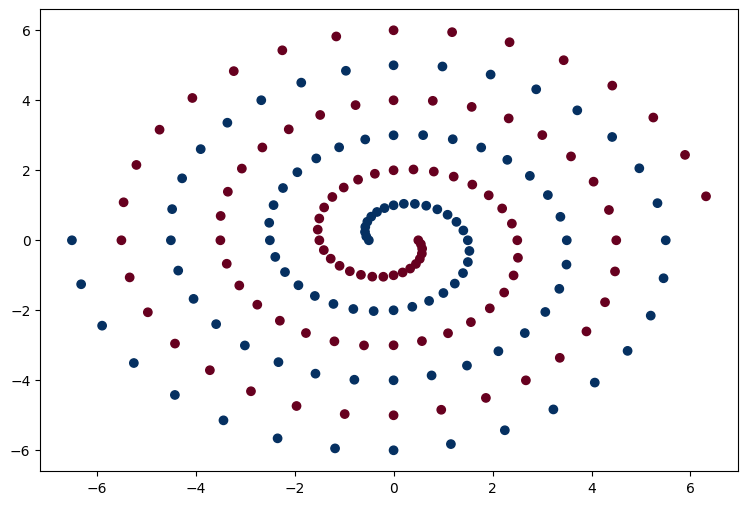

In [290]:

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [301]:
model = keras.Sequential()
model.add(layers.Dense(64, input_shape=(2,), activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_X, train_y, verbose=0, epochs=1300, batch_size=100)

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 64)                192       
_________________________________________________________________
dense_115 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_116 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_117 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_118 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_119 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_120 (Dense)            (None, 32)              

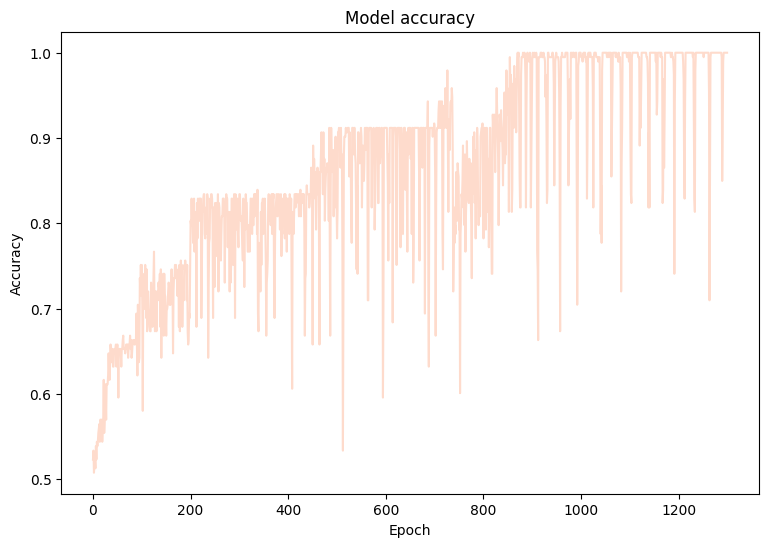

In [304]:
plot_accuracy(history)

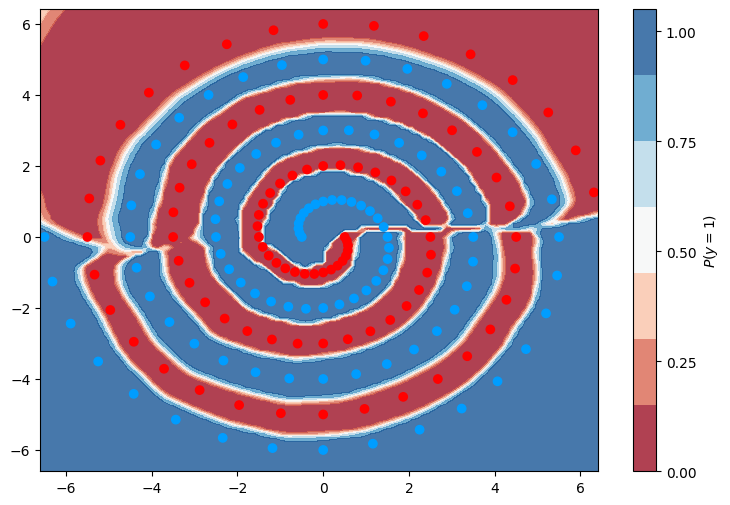

In [305]:
plot_decision_boundary(lambda x: model.predict(x), train_X, train_y)

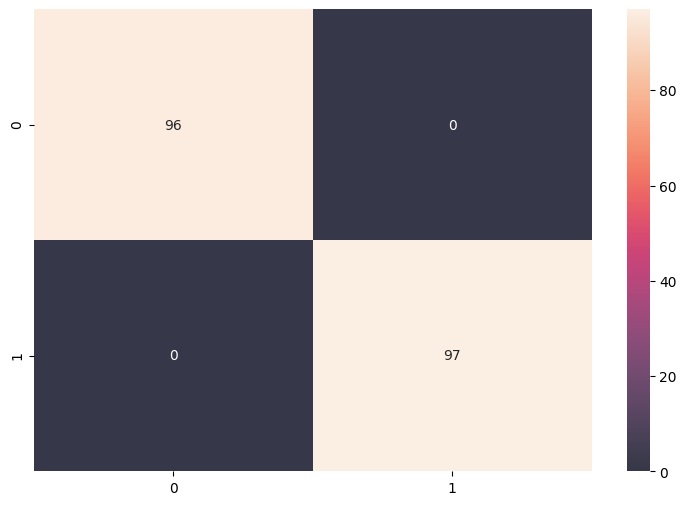

In [294]:
plot_confusion_matrix(model, X, y)

In [295]:
svm = SVC(C=1000, kernel='rbf', gamma='auto')
history = svm.fit(X, y)

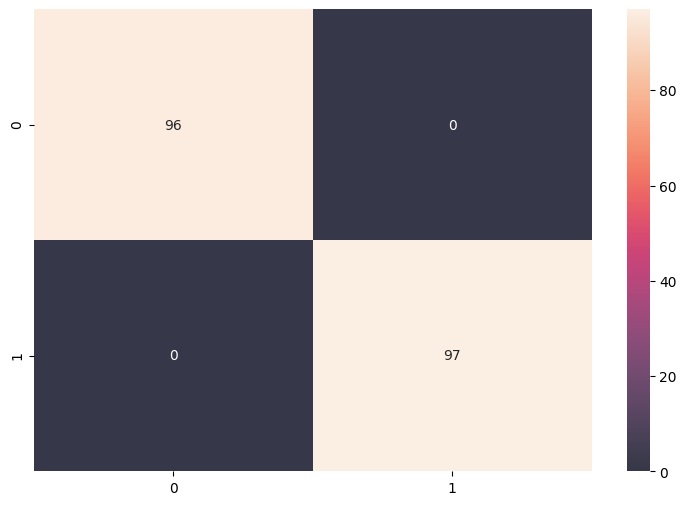

In [296]:
plot_confusion_matrix(svm, X, y)

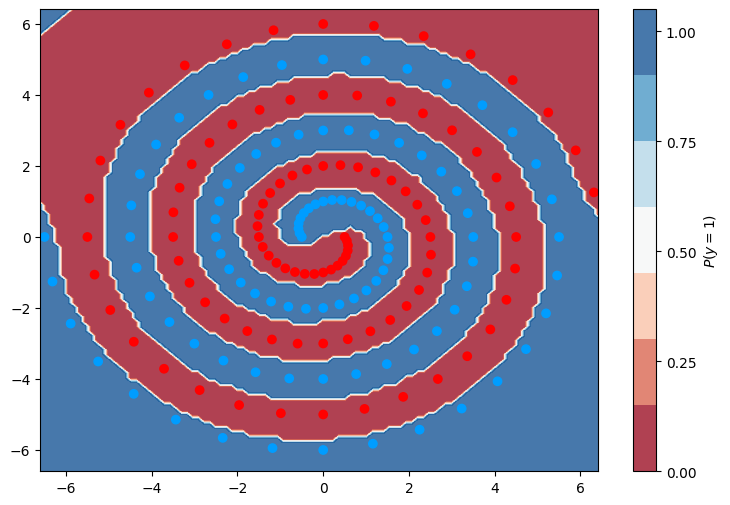

In [297]:
plot_decision_boundary(lambda x: svm.predict(x), X, y)

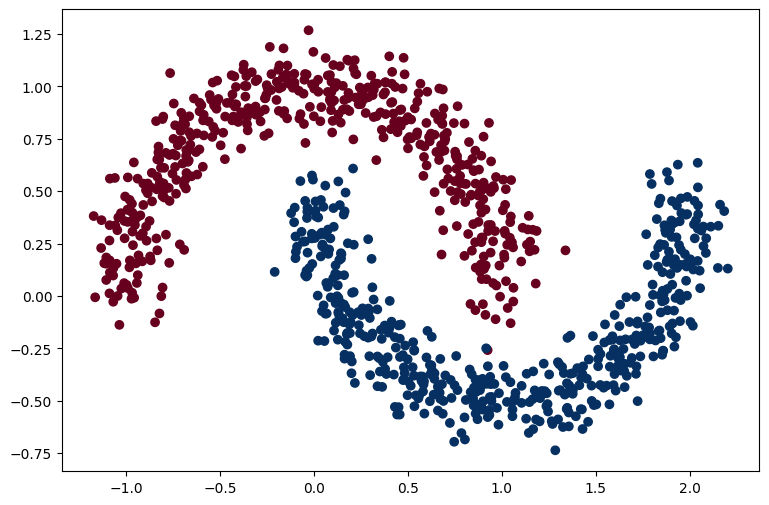

In [298]:
X, y = datasets.make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.scatter(X[:,0], X[:,1],c=y)
plt.show()

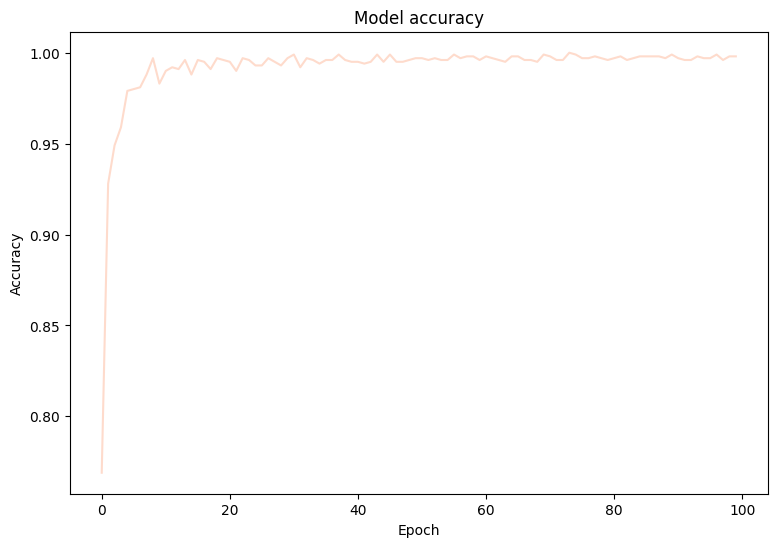

In [299]:
moon_history = model.fit(X, y, verbose=0, epochs=100)
plot_accuracy(moon_history)

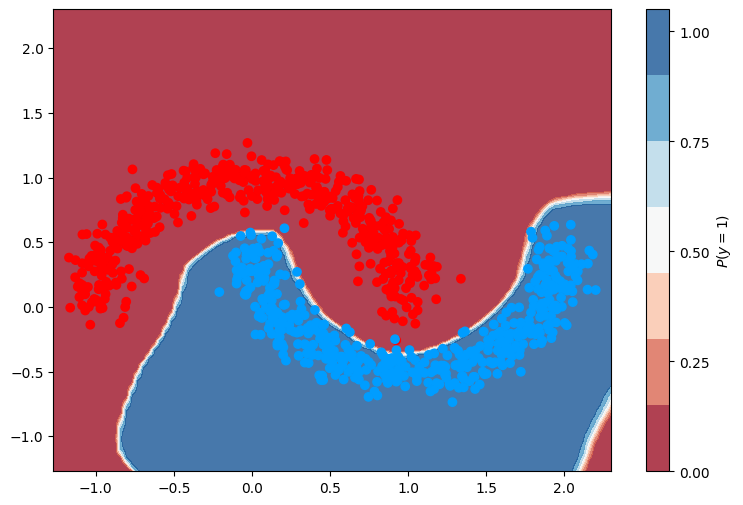

In [300]:
plot_decision_boundary(lambda x: model.predict(x), X, y)

In [302]:
svm.fit(X, y)

SVC(C=1000, gamma='auto')

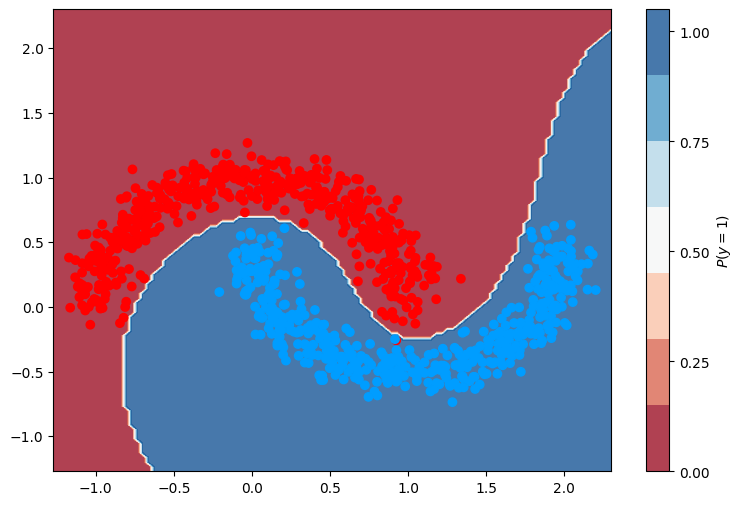

In [303]:
plot_decision_boundary(lambda x: svm.predict(x), X, y)